# 1. CONTEXT

SuperStore is a global retail company. They have so many customers. To celebrate Christmas and New Year, Marketing team wants to deploy marketing campaigns in order to show appreciation to loyalty customers. Beside that, they want to engage with potential customers who could become loyal clients.

# 2. PROBLEM

*  Marketing director suggests using RFM model in Python to classify customers, then launch marketing campaigns to appreciate loyalty customers, as well as engaging potential customers.
*  Suggestion to Marketing and Sales team: In R, F, and M, which one is the most concern?

# 3. EDA

1. Identify data type, data value

a. Data type

*   ***InvoiceNo*** : Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation.
*   ***StockCode*** : Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*   ***Description*** : Product (item) name. Nominal.
*   ***Quantity*** : The quantities of each product (item) per transaction. Numeric.
*   ***InvoiceDate*** : Invoice Date and time. Numeric, the day and time when each transaction was generated.
*   ***UnitPrice*** : Unit price. Numeric, Product price per unit in sterling.
*   ***CustomerID*** : Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   ***Country*** : Country name. Nominal, the name of the country where each customer resides.

b. Data value

*   ***Quantity*** : Contains negative values -> drop them
*   ***UnitPrice*** : Contains negative values -> drop them
Negative values may cause by input process, or the cancellation, return of order. It will affect sale's report.
*   ***Other columns*** : no outliers / negative values.


2. Handle missing values


*   Which column has missing values? How many percent?
*   Reason for missing?
*   Are missing values necessary for data analysis?
*   Solution?


3. Duplicates


*   Are duplicates important? Can they be dropped?





## 3.1 Import packages

In [ ]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3.2 Understanding data

### Load dataset

In [ ]:
# import excel files with sheet name 'ecommerce retail'
ecommerce_retail = pd.read_excel ('ecommerce retail.xlsx', sheet_name ='ecommerce retail')

In [ ]:
#copy dataframe
df = ecommerce_retail.copy()

### Basic data exploration

In [ ]:
df.head()

# show rows and columns count
print(f'Rows count: {df.shape[0]}\nColums count: {df.shape[1]}')

# show data type
df.info()

# further checking on columns
df.shape
df.describe()

# check null values
df.isnull().sum()

# check unique values
## print the percentage of unique
num_unique = df.nunique().sort_values()
print('---Percentage of unique values (%)---')
print(100/num_unique)

# check missing data
missing_value = df.isnull().sum().sort_values(ascending = False)
missing_percent = df.isnull().mean().sort_values(ascending = False)
print('---Number of missing values in each column---')
print(missing_value)
print('---Percentage of missing values (%)---')
if missing_percent.sum():
  print(missing_percent[missing_percent > 0] * 100)
else:
  print('None')

# check for duplicates
## show number of duplicated rows
print(f'Number of entirely duplicated rows: {df.duplicated().sum()}')
## show all duplicated rows
df[df.duplicated()]

Rows count: 541909
Colums count: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
---Percentage of unique values (%)---
Country        2.631579
Quantity       0.138504
UnitPrice      0.061350
StockCode      0.024570
Description    0.023680
CustomerID     0.022873
InvoiceDate    0.004299
InvoiceNo      0.003861
dtype: float64
---Number of missing values 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
# change data type of Invoice No to string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

### Explore negative values of Quantity columns (Quantity < 0)

In [ ]:
# print out some rows where Quantity < 0
print('Some rows have Quantity < 0')
print(df[df['Quantity']<0].head())


# further checking
## make a new column: True if InvoiceNo has 'C', False if InvoiceNo has no 'C'
df['Cancellation'] = df['InvoiceNo'].str.contains('C')

## check InvoiceNo has 'C' and Quantity < 0
print(df[(df['Cancellation'] == True) & (df['Quantity'] < 0)].head())
print('asoidfbao',df['CustomerID'].isna().sum())

## check InvoiceNo has no 'C' and Quantity < 0
print(df[(df['Cancellation'] == False) & (df['Quantity'] < 0)].head())

Some rows have Quantity < 0
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383

### Explore negative values of Quantity columns (UnitPrice < 0)

In [ ]:
# print out some rows where Quantity < 0
print('Some rows have UnitPrice < 0')
print(df[df['UnitPrice'] < 0].head())

Some rows have UnitPrice < 0
       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  Cancellation  
299983  -11062.06         NaN  United Kingdom         False  
299984  -11062.06         NaN  United Kingdom         False  


In [ ]:
# seperate InvoiceDate to Day and Month columns
df['Day'] = pd.to_datetime(df.InvoiceDate).dt.date
df['Month'] = df['Day'].apply(lambda x: str(x)[:-3])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12


## 3.3 Handle negative, missing values, duplicates

### Negative values

In [ ]:
# change data type
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(str)
df['Country'] = df['Country'].astype(str)

# drop negative values in Quantity and UnitPrice column
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# drop InvoiceNo with C
df = df[df['Cancellation'] == False]

# replace NaN
df = df.replace('nan', None)
df = df.replace('Nan', None)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  object        
 1   StockCode     530104 non-null  object        
 2   Description   530104 non-null  object        
 3   Quantity      530104 non-null  int64         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  object        
 7   Country       530104 non-null  object        
 8   Cancellation  530104 non-null  bool          
 9   Day           530104 non-null  object        
 10  Month         530104 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 45.0+ MB


### Missing values

In [ ]:
# show up some rows with missing values
print('---Some rows with missing values---')
df_null = df.isnull()
rows_with_null = df_null.any(axis=1)
df_with_null = df[rows_with_null]
print(df_with_null.head(10))


---Some rows with missing values---
     InvoiceNo StockCode                          Description  Quantity  \
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   
1452    536544     21809     CHRISTMAS HANGING TREE WITH BELL         1   

             InvoiceDate  UnitPrice CustomerID         Country  Cancellation  \
1443 2010-12-01 14:32:00       2.51       None  United Kin

In [ ]:
# drop rows with CustomerID == None
df_no_na = df.drop(df[df['CustomerID'].isnull()].index)
df_no_na

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,2011-12-09,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,2011-12-09,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12-09,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12-09,2011-12


### Duplicated values

In [ ]:
# locate the values are not duplicated in the selected columns
df_no_dup = df_no_na.loc[~df.duplicated(subset = ['InvoiceNo','StockCode','InvoiceDate','UnitPrice','CustomerID','Country'])].reset_index(drop=True).copy()


In [ ]:
# check an example of duplicate in InvoiceNo
df_no_dup.query('InvoiceNo == "536365"')

df_no_dup.query('InvoiceNo == "581587"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation,Day,Month
387923,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,False,2011-12-09,2011-12
387924,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,False,2011-12-09,2011-12
387925,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,False,2011-12-09,2011-12
387926,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,False,2011-12-09,2011-12
387927,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680.0,France,False,2011-12-09,2011-12
387928,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France,False,2011-12-09,2011-12
387929,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,False,2011-12-09,2011-12
387930,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France,False,2011-12-09,2011-12
387931,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,False,2011-12-09,2011-12
387932,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12-09,2011-12


In [ ]:
# drop duplicates, keep the first row of subset
df_main = df.drop_duplicates(subset=["InvoiceNo", "StockCode","InvoiceDate","CustomerID"], keep = 'first')

df_main.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12


In [ ]:
# create Sales column (Quantity * UnitPrice)
df_main['Sales'] = df_main.Quantity * df.UnitPrice

# take max('Day') for recently interaction of customer
last_day = df_main.Day.max()

last_day
df_main


<ipython-input-18-de695ace6662>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Sales'] = df_main.Quantity * df.UnitPrice


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancellation,Day,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010-12-01,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010-12-01,2010-12,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,2011-12-09,2011-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,2011-12-09,2011-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12-09,2011-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011-12-09,2011-12,16.60


# 4. DATA PROCESSING

## 4.1 Handle Segmentation table

### Load Segmentation table

In [ ]:
# import excel files with sheet name 'Segmentation'
segmentation = pd.read_excel ('ecommerce retail.xlsx', sheet_name ='Segmentation')

In [ ]:
# copy dataframe
df_seg = segmentation

df_seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


### Transform Segmentation

In [ ]:
df_seg['RFM Score'] = df_seg['RFM Score'].str.split(',')
df_seg = df_seg.explode('RFM Score').reset_index(drop=True)

df_seg.head()

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


## 4.2 RFM

In [ ]:
df_RFM = df_main.groupby('CustomerID').agg(
    Recency = ('Day', lambda x: last_day - x.max()),
    Frequency = ('CustomerID','count'),
    Monetary = ('Sales','sum'),
    Start_Date = ('Day','min')
).reset_index()

df_RFM['Recency'] = df_RFM['Recency'].dt.days.astype('int16')
# take opposite of Recency
df_RFM['Reverse_Recency'] = -df_RFM['Recency']
df_RFM['Start_Date'] = pd.to_datetime(df_RFM.Start_Date)


In [ ]:
df_RFM['R'] = pd.qcut(df_RFM['Reverse_Recency'], 5, labels = range(1,6)).astype(str)
df_RFM['F'] = pd.qcut(df_RFM['Frequency'], 5, labels = range(1,6)).astype(str)
df_RFM['M'] = pd.qcut(df_RFM['Monetary'], 5, labels = range(1,6)).astype(str)
df_RFM['RFM'] = df_RFM.R + df_RFM.F + df_RFM.M

df_RFM.head()

,CustomerID,Recency,Frequency,Monetary,Start_Date,Reverse_Recency,R,F,M,RFM
0,12346.0,325,1,77183.60,2011-01-18,-325,1,1,5,115
1,12347.0,2,182,4310.00,2010-12-07,-2,5,5,5,555
2,12348.0,75,27,1595.64,2010-12-16,-75,2,2,4,224
3,12349.0,18,73,1757.55,2011-11-21,-18,4,4,4,444
4,12350.0,310,17,334.40,2011-02-02,-310,1,2,2,122


In [ ]:
# merge with Segementation for comparison
df_RFM_final = df_RFM.merge(df_seg, how='left', left_on='RFM', right_on='RFM Score')

df_RFM_final.head()

,CustomerID,Recency,Frequency,Monetary,Start_Date,Reverse_Recency,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,2011-01-18,-325,1,1,5,115,Cannot Lose Them,115
1,12347.0,2,182,4310.00,2010-12-07,-2,5,5,5,555,Champions,555
2,12348.0,75,27,1595.64,2010-12-16,-75,2,2,4,224,NaN,NaN
3,12349.0,18,73,1757.55,2011-11-21,-18,4,4,4,444,NaN,NaN
4,12350.0,310,17,334.40,2011-02-02,-310,1,2,2,122,NaN,NaN


In [ ]:
# clear space
df_seg['RFM Score'] = df_seg['RFM Score'].str.strip()

In [ ]:
df_RFM_final = df_RFM.merge(df_seg, how='left', left_on='RFM', right_on='RFM Score')

df_RFM_final.head()

,CustomerID,Recency,Frequency,Monetary,Start_Date,Reverse_Recency,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,2011-01-18,-325,1,1,5,115,Cannot Lose Them,115
1,12347.0,2,182,4310.00,2010-12-07,-2,5,5,5,555,Champions,555
2,12348.0,75,27,1595.64,2010-12-16,-75,2,2,4,224,At Risk,224
3,12349.0,18,73,1757.55,2011-11-21,-18,4,4,4,444,Loyal,444
4,12350.0,310,17,334.40,2011-02-02,-310,1,2,2,122,Hibernating customers,122


### Determine Loyal and Non Loyal and showing characteristic of Potential Loyalist

In [ ]:
# Loyal status
df_RFM_final['Loyal_Status'] = df_RFM_final['Segment'].apply(lambda x: 'Loyal' if x in ('Loyal','Potential Loyalist') else 'Non Loyal')

df_RFM_final.head()

,CustomerID,Recency,Frequency,Monetary,Start_Date,Reverse_Recency,R,F,M,RFM,Segment,RFM Score,Loyal_Status
0,12346.0,325,1,77183.60,2011-01-18,-325,1,1,5,115,Cannot Lose Them,115,Non Loyal
1,12347.0,2,182,4310.00,2010-12-07,-2,5,5,5,555,Champions,555,Non Loyal
2,12348.0,75,27,1595.64,2010-12-16,-75,2,2,4,224,At Risk,224,Non Loyal
3,12349.0,18,73,1757.55,2011-11-21,-18,4,4,4,444,Loyal,444,Loyal
4,12350.0,310,17,334.40,2011-02-02,-310,1,2,2,122,Hibernating customers,122,Non Loyal


In [ ]:
# Average of Quantity and Sales according to CustomerID
df_potential_average = df_main.groupby('CustomerID').agg(
    Quantity_Average = ('Quantity','mean'),
    Sales_Average = ('Sales','mean')
).reset_index()

df_potential_average.head()

,CustomerID,Quantity_Average,Sales_Average
0,12346.0,74215.000000,77183.600000
1,12347.0,13.505495,23.681319
2,12348.0,68.925926,59.097778
3,12349.0,8.643836,24.076027
4,12350.0,11.588235,19.670588


In [ ]:
# First Sales and Quantity according to CustomerID
## base on InvoiceDate to get first order -> Quantity, Sales
df_main['Ranking'] = df_main.groupby('CustomerID')['InvoiceDate'].rank(method = 'first')
df_potential_first = df_main[df_main.Ranking == 1][['CustomerID','Quantity','Sales']]
df_potential_first = df_potential_first.rename(columns={'Quantity':'First_Quantity','Sales':'First_Sales'})

df_potential_first.head()

<ipython-input-29-7e28a12086ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Ranking'] = df_main.groupby('CustomerID')['InvoiceDate'].rank(method = 'first')


,CustomerID,First_Quantity,First_Sales
0,17850.0,6,15.30
9,13047.0,32,54.08
26,12583.0,24,90.00
46,13748.0,80,204.00
65,15100.0,32,350.40


In [ ]:
# merge all
df_RFM_final = df_RFM_final.merge(df_potential_average, how = 'left', on = 'CustomerID')
df_RFM_final = df_RFM_final.merge(df_potential_first, how = 'left', on = 'CustomerID')

df_RFM_final.head()

,CustomerID,Recency,Frequency,Monetary,Start_Date,Reverse_Recency,R,F,M,RFM,Segment,RFM Score,Loyal_Status,Quantity_Average,Sales_Average,First_Quantity,First_Sales
0,12346.0,325,1,77183.60,2011-01-18,-325,1,1,5,115,Cannot Lose Them,115,Non Loyal,74215.000000,77183.600000,74215,77183.6
1,12347.0,2,182,4310.00,2010-12-07,-2,5,5,5,555,Champions,555,Non Loyal,13.505495,23.681319,12,25.2
2,12348.0,75,27,1595.64,2010-12-16,-75,2,2,4,224,At Risk,224,Non Loyal,68.925926,59.097778,72,39.6
3,12349.0,18,73,1757.55,2011-11-21,-18,4,4,4,444,Loyal,444,Loyal,8.643836,24.076027,2,15.0
4,12350.0,310,17,334.40,2011-02-02,-310,1,2,2,122,Hibernating customers,122,Non Loyal,11.588235,19.670588,12,25.2


# 5. VISUALIZATION

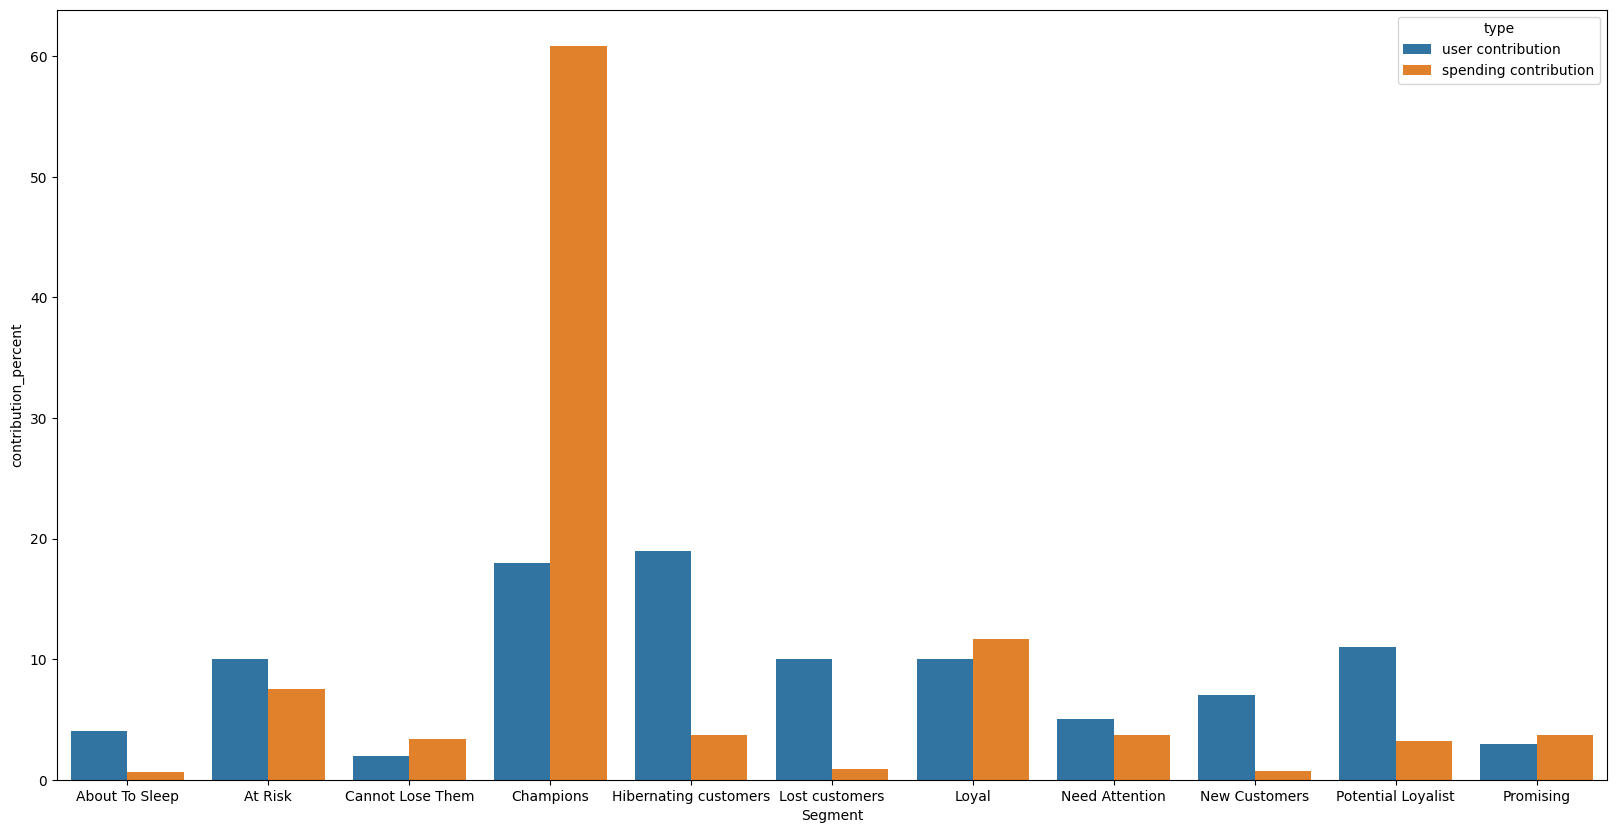

In [37]:
# Visualize spending amount and number of user according to Segment.
user_by_segment = df_RFM_final[['Segment','CustomerID']].groupby(['Segment']).count().reset_index()
user_by_segment = user_by_segment.rename(columns = {'CustomerID':'user_volume'})
user_by_segment['contribution_percent'] = round(user_by_segment['user_volume'] / user_by_segment['user_volume'].sum() * 100)
user_by_segment['type'] = 'user contribution'

spending_by_segment = df_RFM_final[['Segment','Monetary']].groupby(['Segment']).sum().reset_index()
spending_by_segment = spending_by_segment.rename(columns = {'Monetary':'spending'})
spending_by_segment['contribution_percent'] = spending_by_segment['spending'] / spending_by_segment['spending'].sum() * 100
spending_by_segment['type'] = 'spending contribution'

segment_agg = pd.concat([user_by_segment, spending_by_segment])

plt.figure(figsize=(20, 10))
sns.barplot(segment_agg, x='Segment', y='contribution_percent', hue='type')
plt.title='Spending amount and number of user according to Segment'

plt.show()

## Insights & action

1. As showing in the plot, **Champions** customers spend the most and they contribute almost 20%. However, we should mind about **At Risk** customers and **Hibernating** customers as they have 10-20%
**-> Action:** We should deploy some program to encourage them and notify them about new programs.

2. **Potential Loyalist** customers and **Loyal** customers have user contribution at the same but the money spending of **Potential Loyalist** is low (less than 10%). **Promising** customers are low on user contribution and the money spending is the same as **Potential**
**-> Action:** Deploy encouraging programs.